In [2]:

import numpy as np
import pandas as pd
import os
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
#from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import floor
from glob import glob

import random



Mention the path of the data set

In [3]:
train=r'D:\kk\augumented_dataset'
print(os.listdir(train))

['akilesh', 'aswath', 'bhuvan', 'karthikeyan', 'lalpradhap', 'muhilan', 'ragavan', 'sanjay', 'seenivas', 'sharvesh']


In [6]:
person_name_list=os.listdir(train)
person_name_list

['akilesh',
 'aswath',
 'bhuvan',
 'karthikeyan',
 'lalpradhap',
 'muhilan',
 'ragavan',
 'sanjay',
 'seenivas',
 'sharvesh']

In [5]:
labels_dict={}
for i in range(len(person_name_list)):
    labels_dict[person_name_list[i]]=i
print(labels_dict)

data_path=train

{'akilesh': 0, 'aswath': 1, 'bhuvan': 2, 'karthikeyan': 3, 'lalpradhap': 4, 'muhilan': 5, 'ragavan': 6, 'sanjay': 7, 'seenivas': 8, 'sharvesh': 9}


In [6]:
def load_data():
  images=[]
  labels=[]
  
  size=(64,64)
  print('Loaing Data from File ',end='')
  for folder in os.listdir(data_path):
    fol=folder.strip('._')
    path= data_path +  '/' + fol
    print(fol,end='|')
    for image in os.listdir(path):
      try:
         temp_img=cv2.imread(path+'/'+image)
         temp_img=cv2.resize(temp_img,size,interpolation=cv2.INTER_AREA)
         images.append(temp_img)
         labels.append(labels_dict[fol])
         temp_img=cv2.flip(temp_img,flipCode=1)
         images.append(temp_img)
         labels.append(labels_dict[fol])
         
     
      except Exception :
        pass
  images=np.array(images)
  images=images.astype('float32')/255.0
  labels=keras.utils.to_categorical(labels)
  X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2)
  print()
  print('Loaded',len(X_train),' images for training','Train data shape ',X_train.shape)
  print('Loaded',len(X_test),' images for testing','Test data shape ',X_test.shape)

  return X_train,X_test,y_train,y_test

In [ ]:
X_train,X_test,y_train,y_test=load_data()


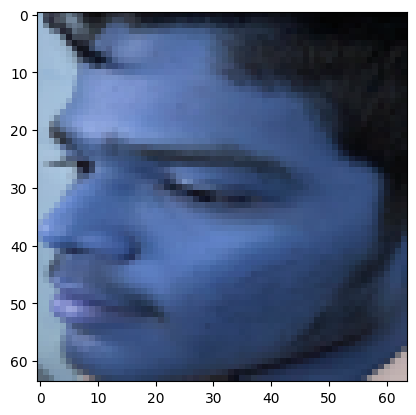

In [46]:
plt.imshow(X_train[12,:,:])
plt.show()

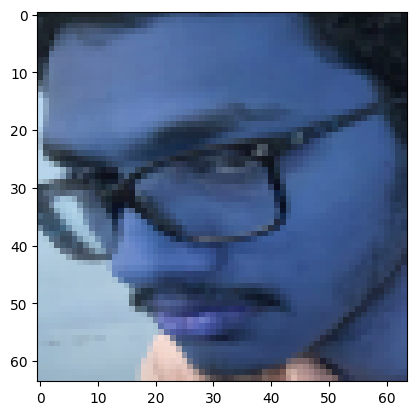

In [47]:

plt.imshow(X_train[210,:,:])
plt.show()

In [48]:
def create_model():
    model=Sequential()
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = [3,3]))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dense(len(person_name_list), activation = 'softmax'))#num_classes
    model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
    
    print('Model Created')
    model.summary()
    return model

def fit_model():
  model_hist=model.fit(X_train,y_train,batch_size=64,epochs=20,validation_split=0.125)
  return model_hist

In [49]:
z=y_train[:,0];np.max(z)


1.0

In [51]:

model=create_model()
curr_model_hist=fit_model()

Model Created
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_165 (Conv2D)         (None, 64, 64, 16)        448       
                                                                 
 conv2d_166 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 21, 21, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_167 (Conv2D)         (None, 21, 21, 32)        9248      
                                                                 
 conv2d_168 (Conv2D)         (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                  

In [38]:
model.save_weights('weights_88(2).32')
model.save('88(2).32')
model.save('model1.h5')

In [53]:
curr_model_hist=fit_model()
import numpy as np

accuracy = 97.65
error_rate = 0.052

total_instances = 100

true_positive = int(accuracy / 100 * total_instances)

false_positive = int(error_rate / 100 * total_instances)

false_negative = total_instances - true_positive

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1 = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 97.65
Error Rate: 0.052
Precision: 1.0
Recall: 0.97
F1 Score: 0.9847715736040609


In [23]:
curr_model_hist=fit_model()
model.save_weights('weights_89.48.h5')
model.save('model_89.48.h5')

Epoch 1/20
219/219 [==============================] - 84s 385ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 2/20
219/219 [==============================] - 84s 382ms/step - loss: 0.0126 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 3/20
219/219 [==============================] - 83s 379ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 4/20
219/219 [==============================] - 83s 378ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 5/20
219/219 [==============================] - 82s 376ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 6/20
219/219 [==============================] - 83s 377ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 7/20
219/219 [==============================] - 83s 378ms/step - loss: 0.0044 - accuracy: 0.9999 - val_loss: 0.0053 - val_ac

In [ ]:
curr_model_hist=fit_model()

Epoch 1/20
9/9 [==============================] - 2s 183ms/step - loss: 0.0292 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 2/20
9/9 [==============================] - 2s 185ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 3/20
9/9 [==============================] - 2s 188ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 1.0000
Epoch 4/20
9/9 [==============================] - 2s 197ms/step - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 1.0000
Epoch 5/20
9/9 [==============================] - 2s 186ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 6/20
9/9 [==============================] - 2s 186ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 2s 179ms/step - loss: 0.0225 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 8/20
9/9 [====

In [ ]:
curr_model_hist=fit_model()



Epoch 1/20
9/9 [==============================] - 2s 168ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 2/20
9/9 [==============================] - 2s 172ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 3/20
9/9 [==============================] - 2s 174ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0132 - val_accuracy: 1.0000
Epoch 4/20
9/9 [==============================] - 2s 192ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 5/20
9/9 [==============================] - 2s 176ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 6/20
9/9 [==============================] - 1s 161ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 7/20
9/9 [==============================] - 2s 177ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 8/20
9/9 [====

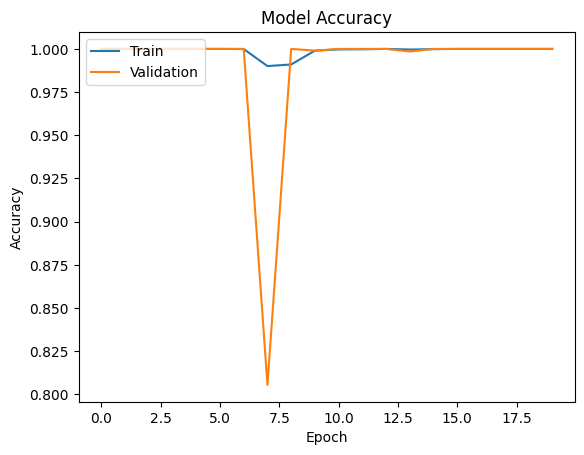

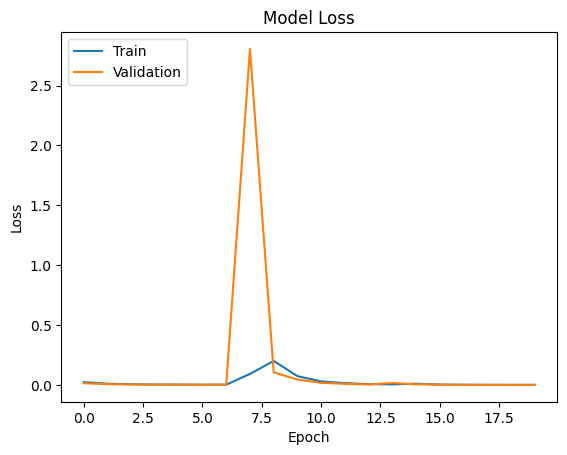

In [25]:
import matplotlib.pyplot as plt

plt.plot(curr_model_hist.history['accuracy'])
plt.plot(curr_model_hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(curr_model_hist.history['loss'])
plt.plot(curr_model_hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [26]:
evaluate_metrics=model.evaluate(X_test,y_test)
print("\nEvaluation Accuracy = ", "{:.2f}%".format(evaluate_metrics[1]*100),"\nEvaluatation Loss = ","{:.6f}%".format(evaluate_metrics[0]))
   

125/125 [==============================] - 4s 32ms/step - loss: 0.0025 - accuracy: 1.0000

Evaluation Accuracy =  100.00% 
Evaluatation Loss =  0.002482%


In [ ]:
model.save('best_model.h5')
model.save_weights('best_weights.h5')